<a href="https://colab.research.google.com/github/Rahul786Patidar/Pharmaceutical-Sales-prediction-/blob/main/Task_Pharma2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

Load the Dataset

In [2]:
sample_data=pd.read_csv("/content/drive/MyDrive/DIGICHROME/sample_submission.csv", low_memory=False)
store_data=pd.read_csv("/content/drive/MyDrive/DIGICHROME/store.csv", low_memory=False)
test_data=pd.read_csv("/content/drive/MyDrive/DIGICHROME/test.csv", low_memory=False)
train_data=pd.read_csv("/content/drive/MyDrive/DIGICHROME/train.csv", low_memory=False)

In [3]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
 train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
train_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [7]:
train_data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [8]:
 train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [12]:
#store dataset fill into null values
store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(0)
store_data['CompetitionOpenSinceMonth'] = store_data['CompetitionOpenSinceMonth'].fillna(0)
store_data['CompetitionOpenSinceYear'] = store_data['CompetitionOpenSinceYear'].fillna(0)
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].fillna(0)
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].fillna(0)
store_data['PromoInterval'] = store_data['PromoInterval'].fillna(0)

In [13]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [14]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [15]:
train_score = pd.merge(train_data,store_data,on='Store',how='left')

In [16]:
train_score

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [17]:
#change data types object to int
train_score.loc[train_score['StateHoliday']=='0','StateHoliday'] = 0
train_score.loc[train_score['StateHoliday']=='a','StateHoliday'] = 1
train_score.loc[train_score['StateHoliday']=='b','StateHoliday'] = 2
train_score.loc[train_score['StateHoliday']=='c','StateHoliday'] = 3
#store the value with same column name

train_score['StateHoliday'] = train_score['StateHoliday'].astype(int,copy=False)

In [18]:
train_score.loc[train_score['Assortment']=='a','Assortment'] = 0
train_score.loc[train_score['Assortment']=='b','Assortment'] = 1
train_score.loc[train_score['Assortment']=='c','Assortment'] = 2

train_score['Assortment'] = train_score['Assortment'].astype(int,copy=False)

In [19]:
train_score.loc[train_score['StoreType']=='a','StoreType'] = 0
train_score.loc[train_score['StoreType']=='b','StoreType'] = 1
train_score.loc[train_score['StoreType']=='c','StoreType'] = 2
train_score.loc[train_score['StoreType']=='d','StoreType'] = 3

train_score['StoreType'] = train_score['StoreType'].astype(int,copy=False)

In [20]:
train_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [21]:
train_score['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [22]:
# code for changing format of data from object to datetime
train_score['Date'] = pd.to_datetime(train_score['Date'],format = '%Y-%m-%d')

In [23]:
train_score['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(train_data['Date']).month

In [24]:
#code for change float into integer

train_score['CompetitionOpenSinceYear'] = train_score['CompetitionOpenSinceYear'].astype(int)
train_score['Promo2SinceYear'] = train_score['Promo2SinceYear'].astype(int)

In [25]:
train_score['CompetitionDistance'] = train_score['CompetitionDistance'].astype(int)
train_score['Promo2SinceWeek'] = train_score['Promo2SinceWeek'].astype(int)

In [26]:
train_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [27]:
train_score

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900,1,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880,1,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260,1,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870,1,0,0,0,0,0


In [28]:
train_score.describe().apply(lambda x:round(x,2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


Data Vizualization

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Year')

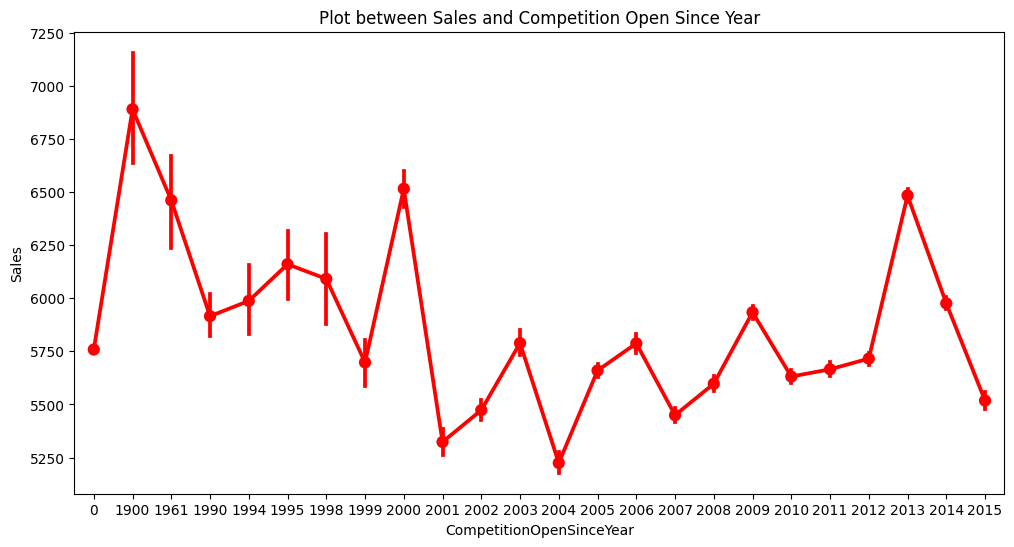

In [29]:
plt.figure(figsize = (12,6))
sns.pointplot(x='CompetitionOpenSinceYear',y='Sales',data=train_score,color = 'Red')
sns.set_style('dark')
plt.title("Plot between Sales and Competition Open Since Year")

From this chart we get insights that sales is Highest during the year 1990 because for that time there are limited number of stores, hence the competition is very low.But as year pass,no of stores get increased that means competiion also increased accordignly,hence sales decline year by year.

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

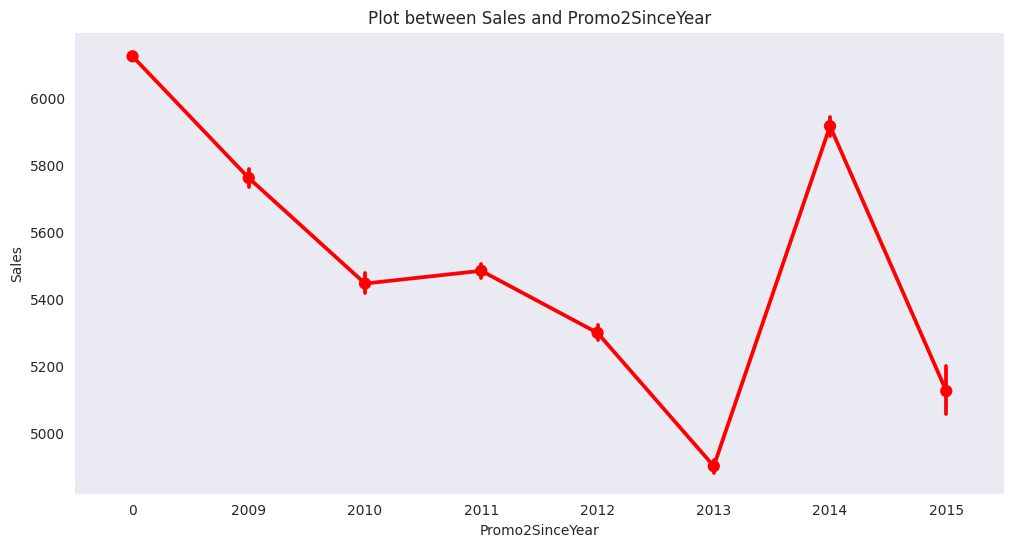

In [30]:
plt.figure(figsize=(12,6))
sns.pointplot(x ='Promo2SinceYear',y='Sales',data=train_score,color='Red')
sns.set_style('dark')
plt.title("Plot between Sales and Promo2SinceYear")

From this Graph we saw that sales of stores is effected which continues their promotion.The sales in 2013 and 2015 are very low inspite promotion.The reason can be more competition year by year

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

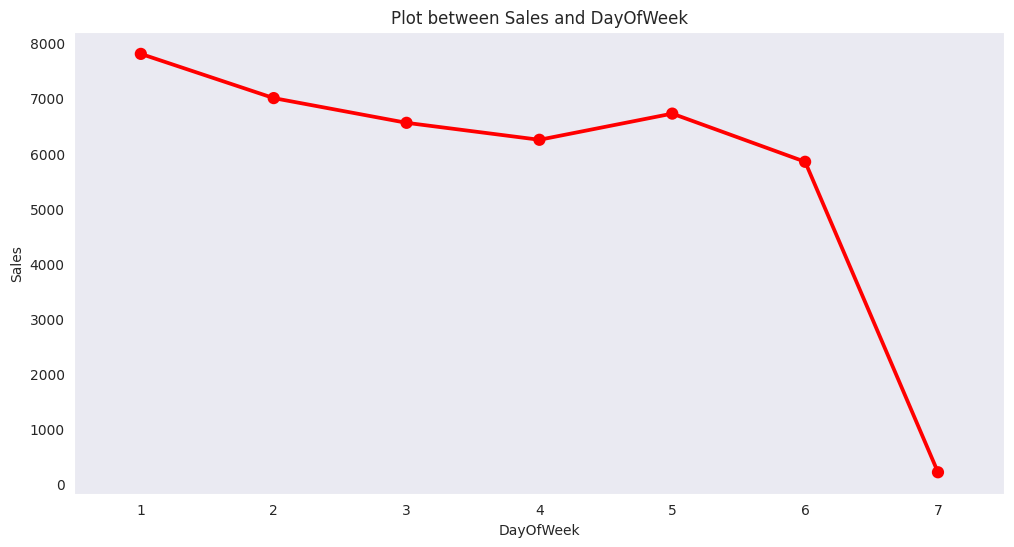

In [31]:
plt.figure(figsize=(12,6))
sns.pointplot(x ='DayOfWeek',y='Sales',data=train_score,color='Red')
sns.set_style('dark')
plt.title("Plot between Sales and DayOfWeek")

From this graph we get insights that maximum sales is on day 1 which is monday and the same is decreasing till days 6 which is saturday.Most of the stores are closed on day 7 which is sunday,so the sales is closed to zero.

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth')

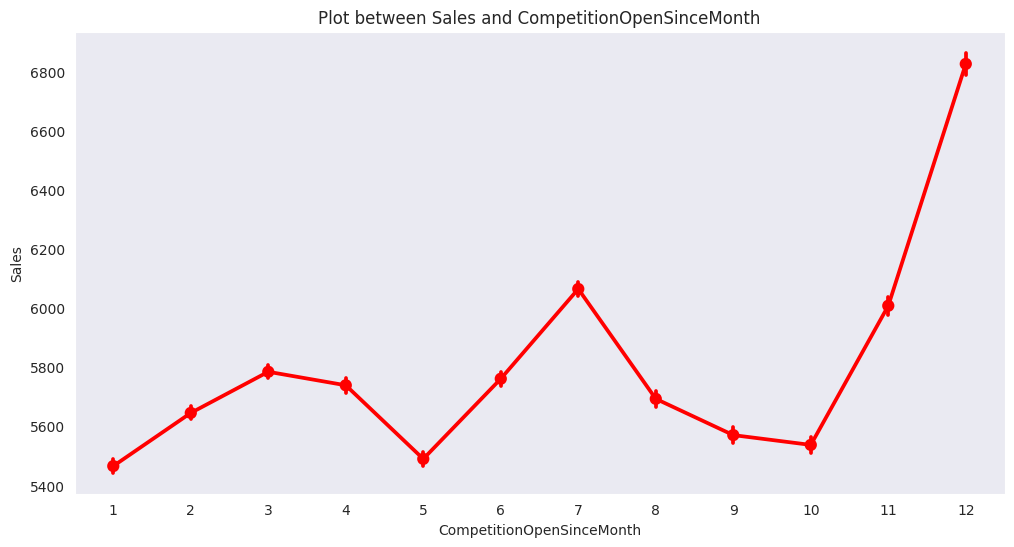

In [32]:
plt.figure(figsize=(12,6))
sns.pointplot(x ='CompetitionOpenSinceMonth',y='Sales',data=train_score,color='Red')
sns.set_style('dark')
plt.title("Plot between Sales and CompetitionOpenSinceMonth")

Text(0.5, 1.0, 'Boxplot For Sales Values')

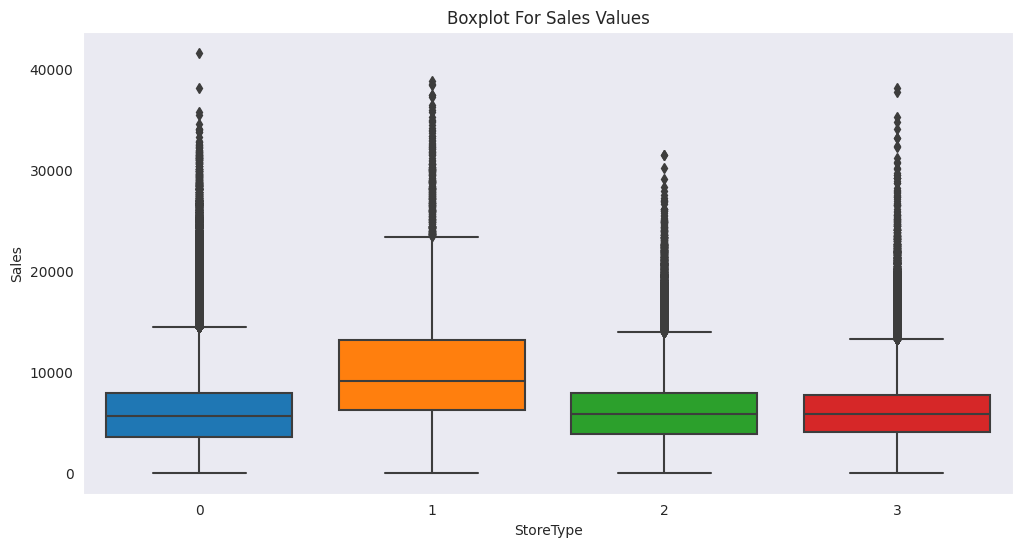

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='StoreType',y='Sales',data=train_score,saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basic of Assortment')

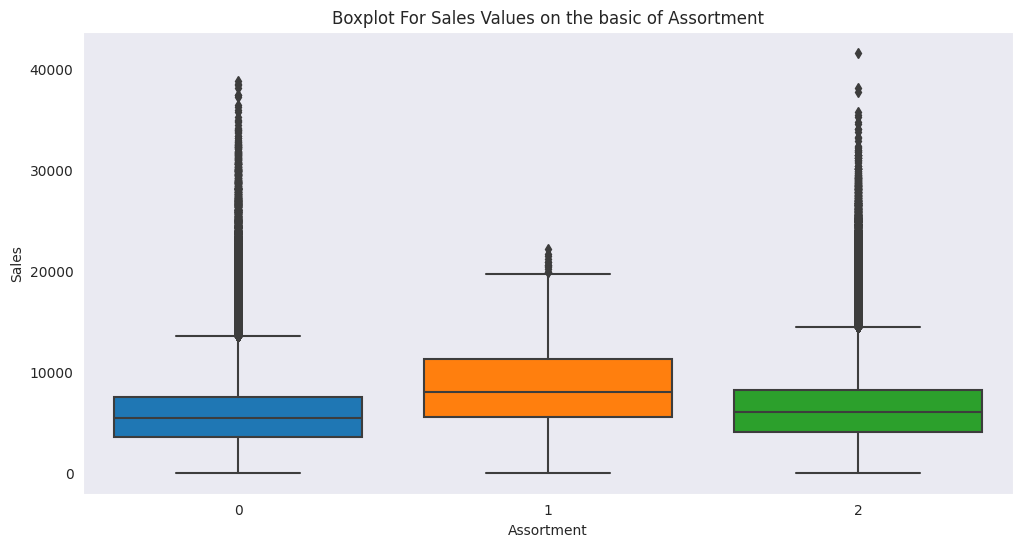

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Assortment',y='Sales',data=train_score,saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basic of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

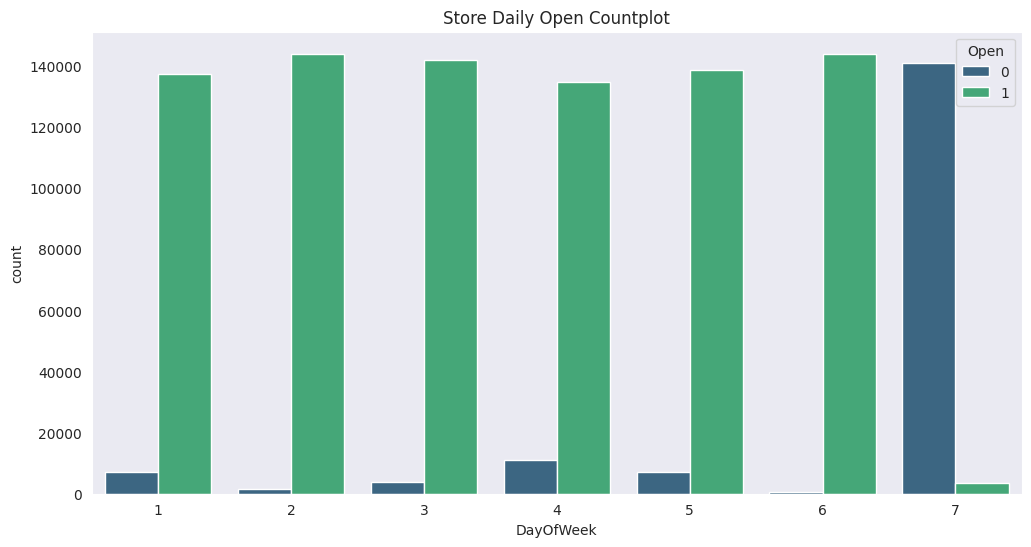

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',hue='Open',data=train_score,palette='viridis')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

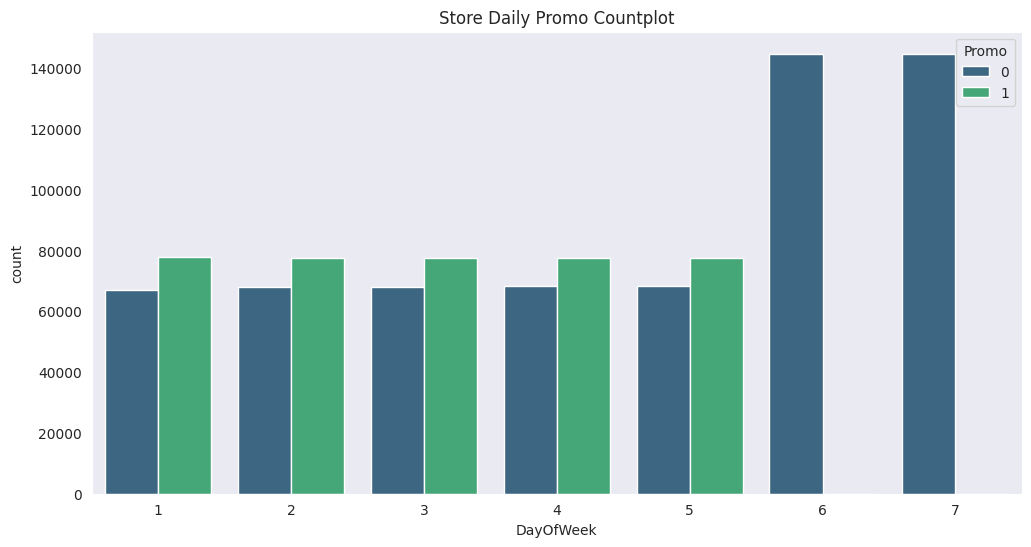

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',hue='Promo',data=train_score,palette='viridis')
plt.title('Store Daily Promo Countplot')

<Axes: xlabel='Promo', ylabel='Sales'>

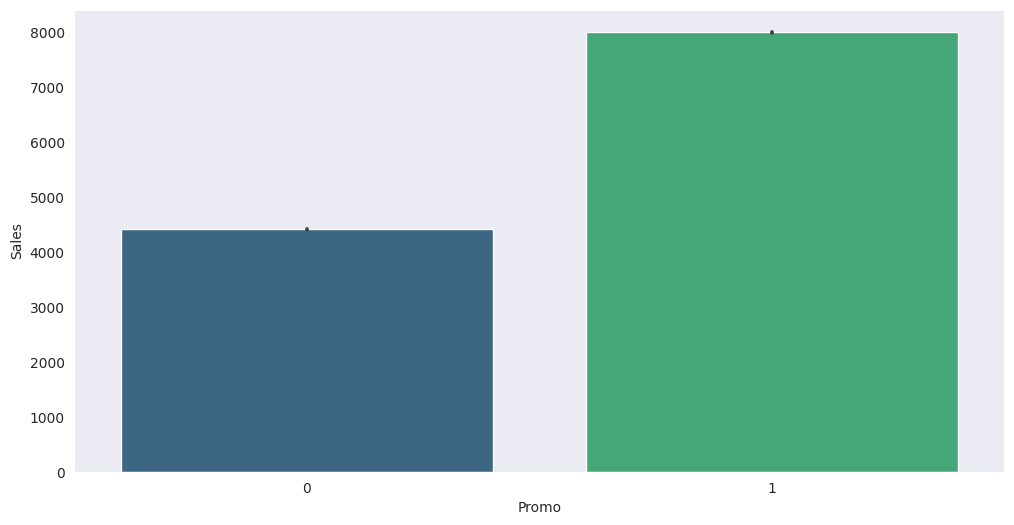

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x='Promo',y='Sales',data=train_score,palette='viridis')


Here 0 represents the store which didn't option for promotion and 1 represents the store which  option for promotion.Those store who took promotions their sales are high as compared to stores didn't took promotion.

 ***State Holiday***

Public Holiday = 0 ,Easter Holiday =1 , Christmas= 2 ,None = 3

<Axes: xlabel='StateHoliday', ylabel='Sales'>

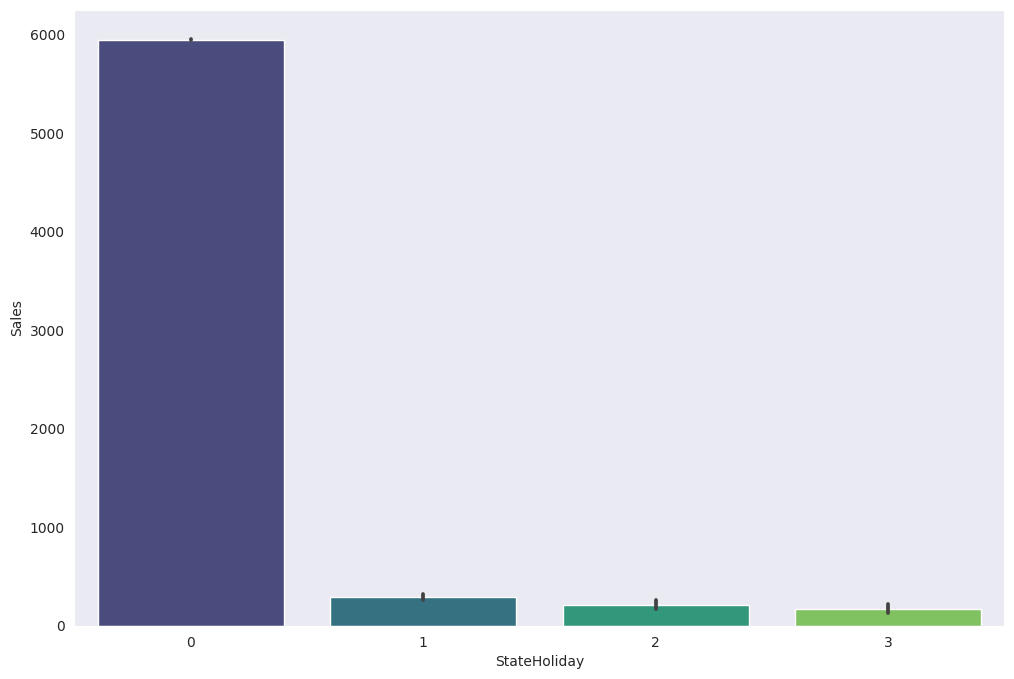

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x='StateHoliday', y='Sales',data=train_score,palette='viridis')

**School Holiday**

Not Holiday = 0 , Holiday = 1

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

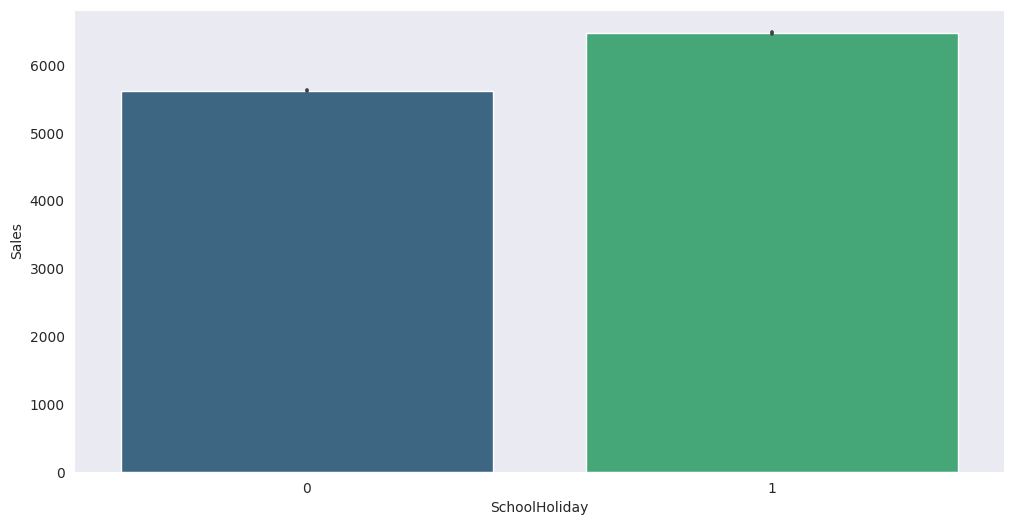

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='SchoolHoliday',y='Sales',data=train_score,palette='viridis')

We can observe that most of the stores remain closed during state and holiday.But it is interesting to note that the number of stores opened during school holiday were more than that were opened during state holidays.Another important thing to note is that the store which were opened during school holiday had more sales than normal.

**Conclusion of EDA**

1) From plot sales and competition Open since Month shows sales go increasing from November and highest in month December.

2) From plot sales and day of week ,Sales highest on Monday and start declining from Tuesday to saturday and on sunday sales almost near zero.

3) Plot between Promotion and sales shows that promotion helps in increasing sales.

4) Type of store plays an important role in opening pattern of stores.

5)All Type 'b' stores never closed except for refurbishment or other reason.

6)All Type 'b' stores have comparatively higher sales and it mostly constant with peaks appears on weekends.

7)Assortment Level 'b' is only offered at Store Type 'b'.

8)we can observe that most of the stores remain closed during state holidays.But it is interesting to note that the number of store opened during school holiday were more than that were opened during state holiday.

**Feature Engineering & Data Pre-processing**

<ipython-input-40-79ededbf2687>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_score.corr()


<Axes: >

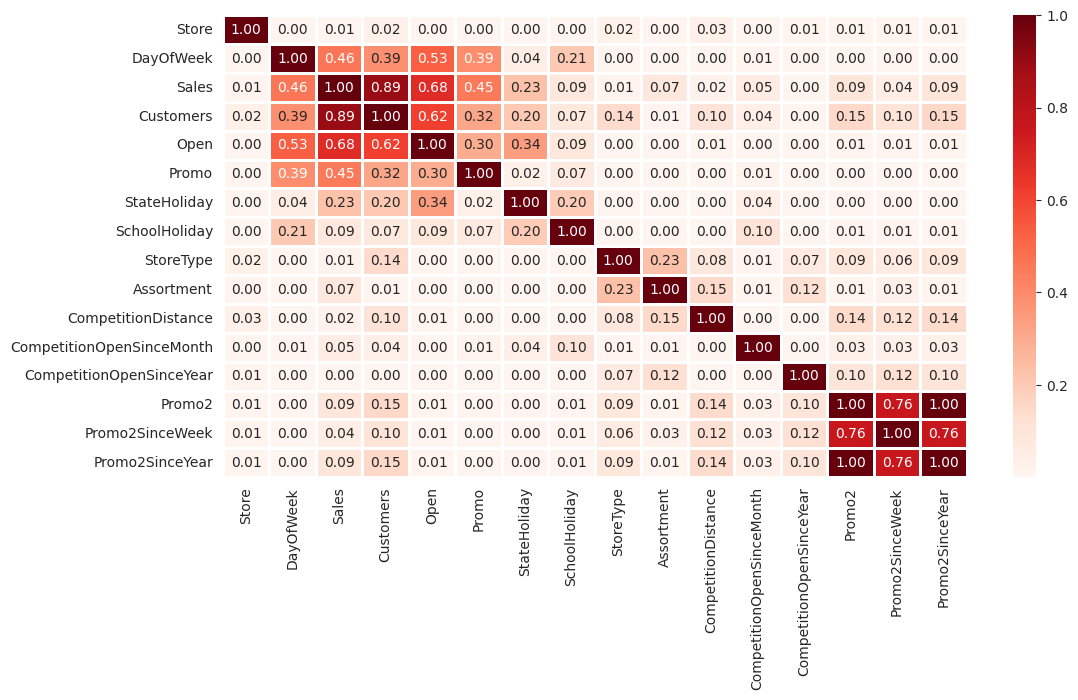

In [40]:
plt.figure(figsize=(12,6))
correlation = train_score.corr()
sns.heatmap(abs(correlation),annot=True,cmap='Reds',linewidths=2,fmt='.2f')

The color of the cell indicates the direction and strength of the correlation.Apositive correlation is indicated by a warm color(such as red) and a negative correlation is indicated by a cool color(such as orange).The intensity of the color represents the strength of the correlation.

**Multicollinearity**

Multicollinearity is a statistical term that refers to the situation where two or more predictor variables in a regression model are highly correlated with each other

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    #calculating VIF
    vif= pd.DataFrame()
    vif['variables'] = X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

    return(vif)

In [42]:
calc_vif(train_score[[i for i in train_score.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


In the above table we can see that variance_inflation_factor value for column Promo2 and Promo2sinceyear is higher.So we will drop either promo2 or promo2sinceyear and again check VIF values.Here we drop Promo2 column.

In [43]:
calc_vif(train_score[[i for i in train_score.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


VIF factor below 10 is look good for Machine Learning Model.

**Analysis of Target Variable(Sales)**

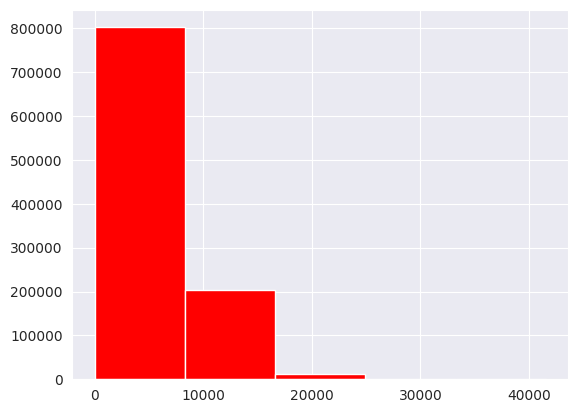

In [44]:
pd.Series(train_score['Sales'],).hist(bins=5, color='red')
plt.show()

In [45]:
train_score[(train_score.Open ==0) & (train_score.Sales ==0)].count()[0]

172817

so we will drop those store which sales is 0 assuming that the stores were closed temporarilly and this will help to train the model more accuractely.

In [46]:
new_data = train_score.drop(train_score[(train_score.Open == 0) & (train_score.Sales ==0)].index)

In [47]:
new_data.shape

(844392, 18)

In [48]:
new_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


In new_data dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [49]:
train_score = pd.get_dummies(train_score,columns= ['PromoInterval'])

In [50]:
train_score


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900,1,2014,1,31,2013,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880,1,2006,0,0,0,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260,1,0,0,0,0,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870,1,0,0,0,0,1,0,0,0


In [68]:
new_data.to_csv('cleandata.csv',index = False)

In [69]:
ls

cleandata.csv  drive/  sample_data/


In [70]:
train_score.to_csv('cleandata1.csv',index = False)

We define dependent and independent variable and convert them in to arrays

In [51]:
# we define dependent variable
dep_var = 'Sales'

#define independent variable
indep_var =train_score.columns.drop(['Store','Promo2SinceYear','Date','Sales'])

In [52]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [53]:
#Create the data of independent variables
X = train_score[indep_var].values

#create the dependent vaariable data
y = train_score[dep_var].values

In [54]:
X

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]])

In [55]:
y

array([5263, 6064, 8314, ...,    0,    0,    0])

In [56]:
train_score[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

splitting the dataset

In [58]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(813767, 17)
(203442, 17)


Linear Regression

In [59]:
 #scaling the x values
 scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# fitting the data into Linear Regression mode
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = linear_regression.predict(X_test)
y_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [62]:
linear_regression.score(X_train,y_train)

0.8677978490444807

In [63]:
regression_Dataframe = pd.DataFrame(zip(y_test,y_pred),columns = ['actual','pred'])
regression_Dataframe

,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


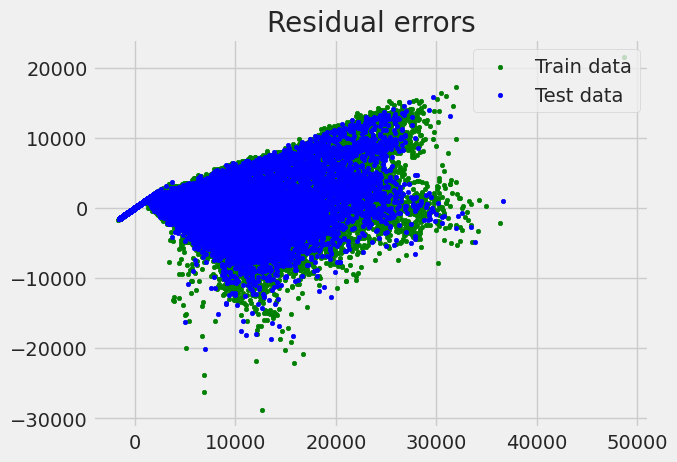

In [64]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(linear_regression.predict(X_train),
            linear_regression.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(linear_regression.predict(X_test),
            linear_regression.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

Mean Square Error

In [65]:
sales_mean = train_score[dep_var].mean()

In [66]:
from sklearn.metrics import r2_score
import numpy

In [67]:

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error

mean_absolute_error = MAE(y_test,y_pred)
print("mean_absolute_error :",mean_absolute_error)

MSE = mean_squared_error(y_test,y_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred)
print("R2 :",r2)

mean_absolute_error : 943.805348030579
MSE : 1944268.5102740775
RMSE : 1394.370291663616
RMPSE : 0.24149878933714092
R2 : 0.8684236859866605
